In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Read in all the data from each subreddit and time interval

# MentalHealthRedditData
PreCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidMentalHealthRedditData.csv')
PreCovidMentalHealthRedditData = PreCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/DuringCovidMentalHealthRedditData.csv')
DuringCovidMentalHealthRedditData = DuringCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidMentalHealthRedditData.csv')
PostCovidMentalHealthRedditData = PostCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})



In [17]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [18]:
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [19]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [20]:
# Run for Roberta Model for MentalHealthRedditData Titles and Content
PreCovidMentalHealthRedditDataTitle = {}
PreCovidMentalHealthRedditDataContent = {}

DuringCovidMentalHealthRedditDataTitle = {}
DuringCovidMentalHealthRedditDataContent = {}

PostCovidMentalHealthRedditDataTitle = {}
PostCovidMentalHealthRedditDataContent = {}

AllMentalHealthRedditDataTitle = {}
AllMentalHealthRedditDataContent = {}

for i, row in tqdm(PreCovidMentalHealthRedditData.iterrows(), total=len(PreCovidMentalHealthRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidMentalHealthRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidMentalHealthRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidMentalHealthRedditData.iterrows(), total=len(DuringCovidMentalHealthRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidMentalHealthRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidMentalHealthRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidMentalHealthRedditData.iterrows(), total=len(PostCovidMentalHealthRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidMentalHealthRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidMentalHealthRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/206 [00:00<?, ?it/s]

Broke for Pre Content id 39
Broke for Pre Content id 60
Broke for Pre Content id 76
Broke for Pre Content id 99
Broke for Pre Content id 123
Broke for Pre Content id 133
Broke for Pre Content id 152
Broke for Pre Content id 153
Broke for Pre Content id 163
Broke for Pre Content id 185


  0%|          | 0/328 [00:00<?, ?it/s]

Broke for During Content id 0
Broke for During Content id 84
Broke for During Content id 118
Broke for During Content id 128
Broke for During Content id 133
Broke for During Content id 145
Broke for During Content id 146
Broke for During Content id 149
Broke for During Content id 163
Broke for During Content id 167
Broke for During Content id 187
Broke for During Content id 194
Broke for During Content id 214
Broke for During Content id 223
Broke for During Content id 246
Broke for During Content id 253
Broke for During Content id 261
Broke for During Content id 270
Broke for During Content id 280
Broke for During Content id 298
Broke for During Content id 310


  0%|          | 0/259 [00:00<?, ?it/s]

Broke for Post Content id 27
Broke for Post Content id 90
Broke for Post Content id 97
Broke for Post Content id 98
Broke for Post Content id 99
Broke for Post Content id 130
Broke for Post Content id 137
Broke for Post Content id 142
Broke for Post Content id 144
Broke for Post Content id 157
Broke for Post Content id 164
Broke for Post Content id 181
Broke for Post Content id 185
Broke for Post Content id 239
Broke for Post Content id 250
Broke for Post Content id 255


In [21]:
preMentalHealthTitle = PreCovidMentalHealthRedditDataTitle
preMentalHealthContent = PreCovidMentalHealthRedditDataContent
preMentalHealthTitleDF = pd.DataFrame(preMentalHealthTitle).T
preMentalHealthContentDF = pd.DataFrame(preMentalHealthContent).T
preMentalHealthTitleDF = preMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthContentDF = preMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthTitleDF = preMentalHealthTitleDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')
preMentalHealthContentDF = preMentalHealthContentDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')

duringMentalHealthTitle = DuringCovidMentalHealthRedditDataTitle
duringMentalHealthContent = DuringCovidMentalHealthRedditDataContent
duringMentalHealthTitleDF = pd.DataFrame(duringMentalHealthTitle).T
duringMentalHealthContentDF = pd.DataFrame(duringMentalHealthContent).T
duringMentalHealthTitleDF = duringMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthContentDF = duringMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthTitleDF = duringMentalHealthTitleDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')
duringMentalHealthContentDF = duringMentalHealthContentDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')

postMentalHealthTitle = PostCovidMentalHealthRedditDataTitle
postMentalHealthContent = PostCovidMentalHealthRedditDataContent
postMentalHealthTitleDF = pd.DataFrame(postMentalHealthTitle).T
postMentalHealthContentDF = pd.DataFrame(postMentalHealthContent).T
postMentalHealthTitleDF = postMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthContentDF = postMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthTitleDF = postMentalHealthTitleDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')
postMentalHealthContentDF = postMentalHealthContentDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')

preMentalHealthTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.106082,0.445555,0.448363,mentalhealth,"Not to brag, but instead of laying in bed ALL ...",NaN,"Honestly, I've found having a shower the most ...",2971,51,2019-04-15 19:13:30,bdk3xt
1,1,0.143865,0.421903,0.434231,mentalhealth,It’s been 2 months to the day since I last sel...,NaN,That's amazing!! Good job Im so happy for you ...,2020,159,2019-10-20 07:12:42,dkgcw0
2,2,0.067821,0.604654,0.327525,mentalhealth,I made a suicide scale. Hoping it could help o...,[suicide scale](https://emmengard.com/2019/05/...,"Living in states 8-9 for twelve years, I thoug...",1963,128,2019-05-07 22:40:26,blxcj7
3,3,0.409131,0.566876,0.023993,mentalhealth,To the person who deleted their post few minut...,I don't really know what's going on with you a...,"Upvoted this to make sure they see it, perhaps...",1356,11,2019-08-24 18:11:22,cuwwed
4,4,0.028931,0.226399,0.744670,mentalhealth,People who welcome you back with open arms aft...,Self isolation is horrific and that is all,"I have a friend I cancel on a lot, and he stil...",1026,25,2019-10-16 04:01:30,dijt4y


/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_44759/4146308485.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


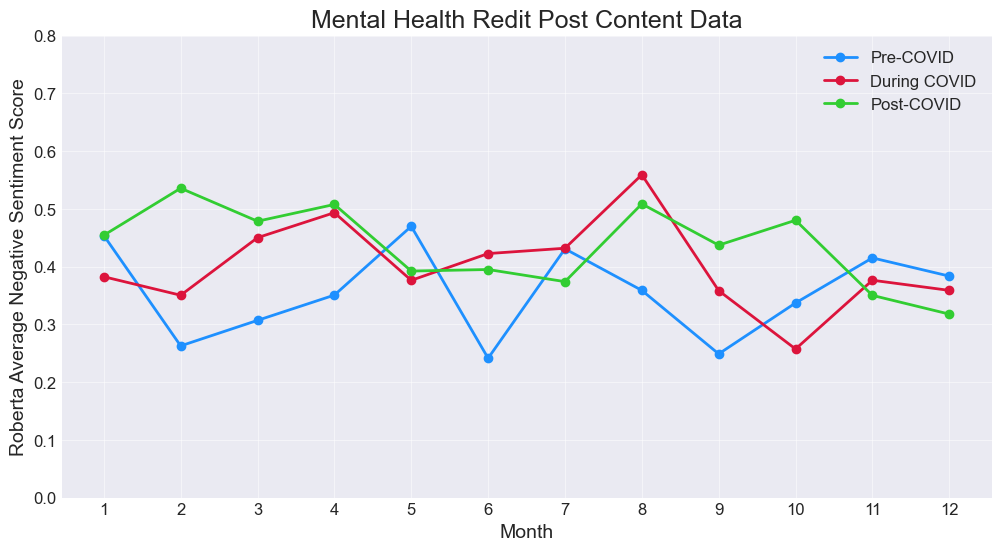

In [27]:
def postsPerMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby('month').count()['uniquePostID']

def postsSumNegByMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby(df['date'].dt.month)['roberta_neg'].sum()

preCovidPostPerMonthData = postsPerMonth(preMentalHealthContentDF)
perCovidPostPerMonthNegSum = postsSumNegByMonth(preMentalHealthContentDF)
preCovidNegPerMonthAverage = perCovidPostPerMonthNegSum / preCovidPostPerMonthData
print(preCovidNegPerMonthAverage)

duringCovidPostPerMonthData = postsPerMonth(duringMentalHealthContentDF)
duringCovidPostPerMonthNegSum = postsSumNegByMonth(duringMentalHealthContentDF)
duringCovidNegPerMonthAverage = duringCovidPostPerMonthNegSum / duringCovidPostPerMonthData
print(duringCovidNegPerMonthAverage)

postCovidPostPerMonthData = postsPerMonth(postMentalHealthContentDF)
postCovidPostPerMonthNegSum = postsSumNegByMonth(postMentalHealthContentDF)
postCovidNegPerMonthAverage = postCovidPostPerMonthNegSum / postCovidPostPerMonthData
print(postCovidNegPerMonthAverage)

plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(preCovidNegPerMonthAverage, label='Pre-COVID', color='dodgerblue', linewidth=2, marker='o')
plt.plot(duringCovidNegPerMonthAverage, label='During COVID', color='crimson', linewidth=2, marker='o')
plt.plot(postCovidNegPerMonthAverage, label='Post-COVID', color='limegreen', linewidth=2, marker='o')

# Customize the plot
plt.title('Number of posts per month for Mental Health', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_44759/2088058563.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


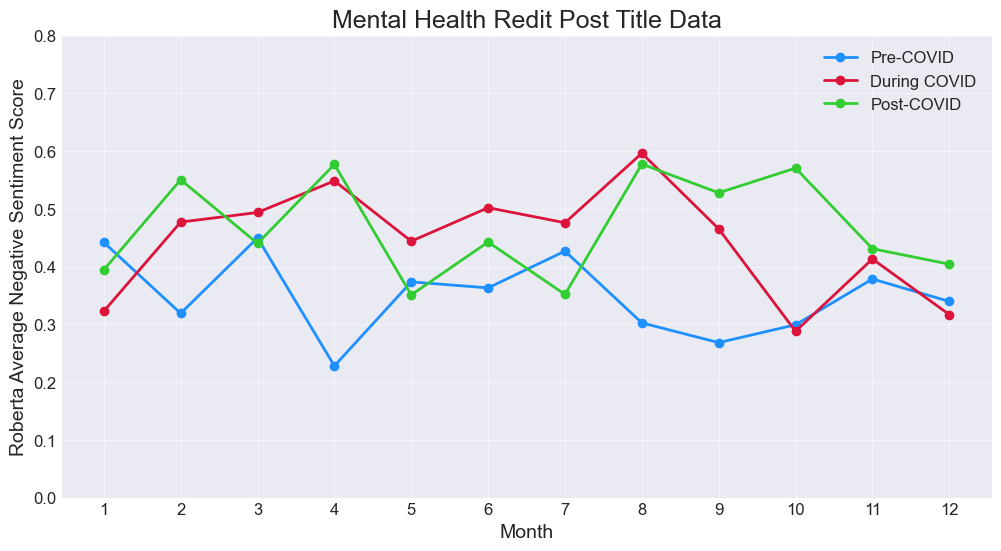